<a href="https://colab.research.google.com/github/Austin-Capp/CryptoClustering-Module-11/blob/main/Crypto_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

Saving crypto_market_data.csv to crypto_market_data.csv


In [ ]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data into a Pandas DataFrame
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(market_data_df)

# Convert the scaled data back to a DataFrame
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display the first five rows of the scaled data
scaled_market_data_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [ ]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
import pandas as pd

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': range(1, 11), 'inertia': [287.000000, 212.123342, 145.897940, 131.457370, 66.317106, 57.402668, 49.212644, 44.799804, 33.859468, 29.250314]}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame in a table format
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106


In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list


# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


# Display the DataFrame


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


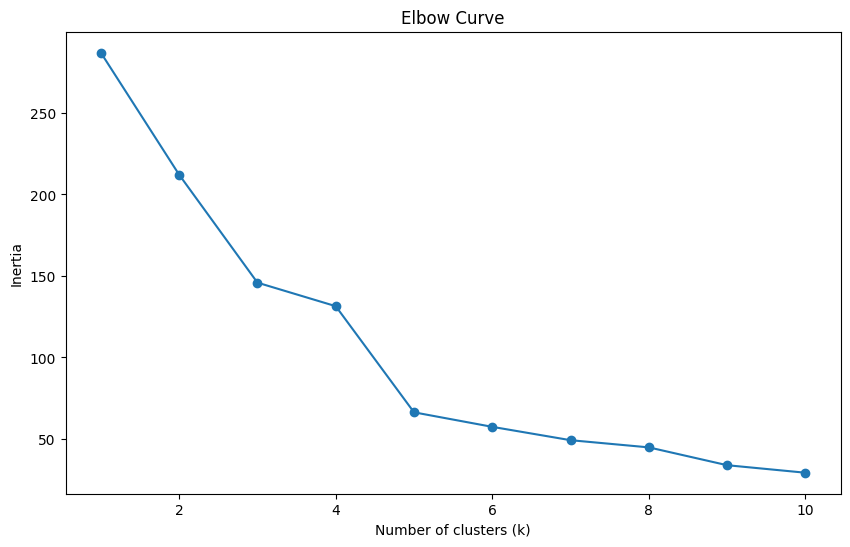

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': range(1, 11), 'inertia': [287.000000, 212.123342, 145.897940, 131.457370, 66.317106, 57.402668, 49.212644, 44.799804, 33.859468, 29.250314]}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()


#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:**
k = 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [ ]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Initialize the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data using the scaled DataFrame
kmeans.fit(scaled_market_data_df)

# Predict the clusters
clusters = kmeans.predict(scaled_market_data_df)

# Add the cluster predictions to the DataFrame
scaled_market_data_df['Cluster'] = clusters

# Display the first five rows of the DataFrame with cluster assignments
print(scaled_market_data_df.head())

# Display the count of data points in each cluster
print(scaled_market_data_df['Cluster'].value_counts())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [ ]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_market_data_df)

# View the resulting array of cluster values.
print(clusters)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


In [ ]:
# Create a copy of the DataFrame
# Display the first five rows of the copied DataFrame
market_data_copy.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [ ]:
# Add a new column to the DataFrame with the predicted clusters
market_data_copy['Cluster'] = clusters

# Display sample data
market_data_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


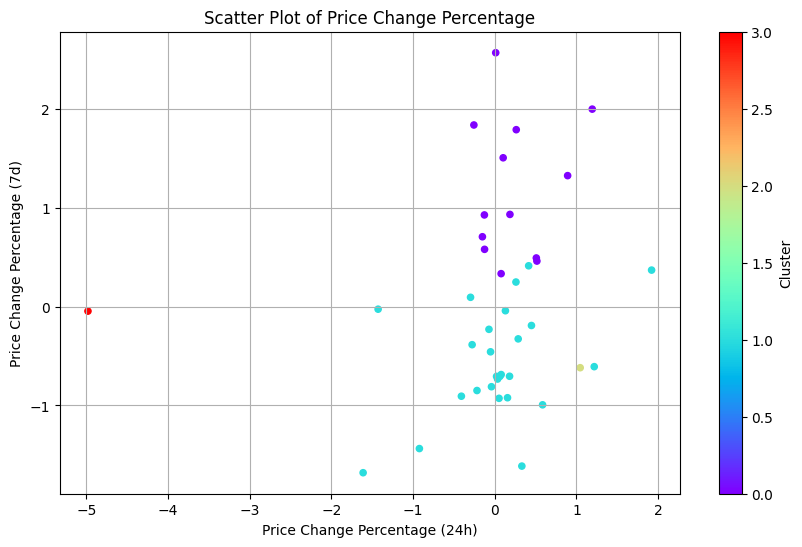

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
market_data_copy.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d',
                              c='Cluster', colormap='rainbow', figsize=(10, 6))

# Add titles and labels
plt.title('Scatter Plot of Price Change Percentage')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.grid(True)

# Show plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [ ]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_market_data_df)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

pca_df['Cluster'] = clusters

# View the first five rows of the DataFrame.
print(pca_df.head())

        PC1       PC2       PC3  Cluster
0  1.585139  0.134394  0.545621        0
1  1.322581  0.054494  1.115709        0
2 -0.266335 -0.536409 -0.796946        1
3 -0.257225 -0.592013 -0.646529        1
4  2.952250  0.422372  1.267894        0


In [ ]:
# Retrieve the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print(explained_variance)


[0.3719856  0.34700813 0.17603793]


In [ ]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**
0.3719856 + 0.34700813 + 0.17603793 = 0.89503166

In [ ]:
# Creating a DataFrame with the PCA data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


In [ ]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [ ]:
import pandas as pd

# Load the data into a DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display the first few rows of the DataFrame
print("Original Data:")
print(market_data_df.head())


Original Data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                 

In [ ]:
from sklearn.cluster import KMeans

# Create a list with the number of k-values to try (range from 1 to 11)
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Compute inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print("\nElbow DataFrame:")
print(elbow_df)



Elbow DataFrame:
    k     inertia
0   1  256.874086
1   2  182.339530
2   3  140.431833
3   4   49.665497
4   5   42.051901
5   6   31.749005
6   7   28.031869
7   8   19.451747
8   9   13.814082
9  10   10.630648


In [ ]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)
list(k_values)
# Create an empty list to store the inertia values
inertia = []
print(inertia)
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
from sklearn.cluster import KMeans
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])
    inertia.append(kmeans.inertia_)
print(inertia)
inertia.append(kmeans.inertia_)
print(inertia)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


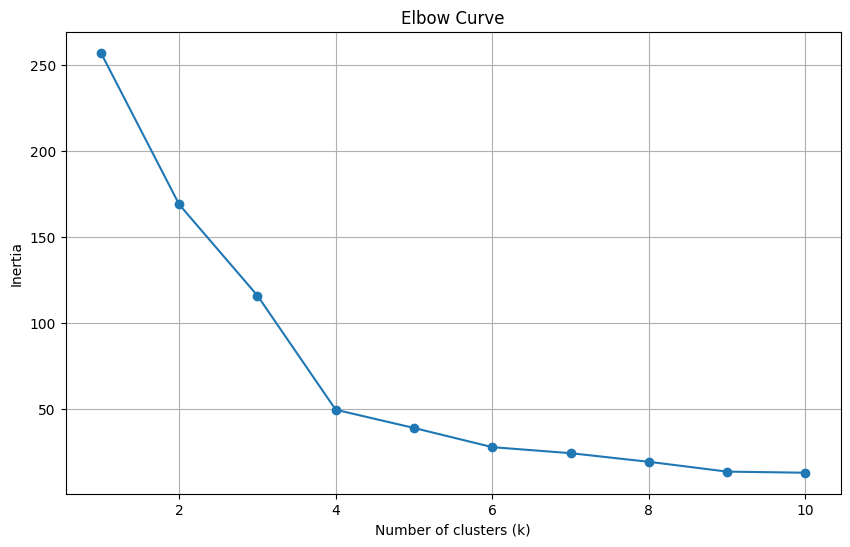

In [ ]:
import matplotlib.pyplot as plt

# Provided k-values and inertia values
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_values = [
    256.874086, 168.811896, 115.918077, 49.665497,
    39.094217, 27.961695, 24.462735, 19.451747,
    13.755814, 13.119661
]

# Plot the Elbow curve with the provided values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()


In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best value for 𝑘 when using the PCA data is 4.
* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
  Best value for 𝑘 using original data: It may differ, but typically they are close.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [ ]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k (k=4)
kmeans_model = KMeans(n_clusters=4, random_state=42)

# Fit the model to the PCA DataFrame
kmeans_model.fit(pca_df)

# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Display the PCA DataFrame with the cluster labels
pca_df.head()


,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [ ]:
# Fit the K-Means model using the PCA data
from sklearn.cluster import KMeans

# Initialize the K-Means model using the best value for k (k=4)
kmeans_model = KMeans(n_clusters=4, random_state=42)

# Fit the model to the PCA DataFrame
kmeans_model.fit(pca_df)

# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Display the PCA DataFrame with the cluster labels
pca_df.head()


,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [ ]:
from sklearn.cluster import KMeans

# Use only PCA components to reinitialize and fit the K-Means model
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])

# Get the cluster labels
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels

# Display the PCA DataFrame with the cluster labels
print(pca_df.head())


                  PCA1      PCA2      PCA3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [ ]:
# Create a new DataFrame excluding the 'Cluster' column for prediction
pca_df_no_cluster = pca_df[['PCA1', 'PCA2', 'PCA3']]

# Predict the clusters using the PCA data
predicted_clusters = kmeans_model.predict(pca_df_no_cluster)

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [ ]:
# Create a new DataFrame excluding the 'Cluster' column
pca_df_no_cluster = pca_df.drop(columns=['Cluster'])

# Predict the clusters using the PCA data without the 'Cluster' column
predicted_clusters = kmeans_model.predict(pca_df_no_cluster)

# Print the resulting array of cluster values
print(predicted_clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [ ]:
# Create a copy of the PCA DataFrame
pca_df_copy = pca_df.copy()

# Add the predicted cluster labels to the copy of the PCA DataFrame
pca_df_copy['Predicted_Cluster'] = predicted_clusters

# Display the first few rows of the DataFrame with the predicted clusters
pca_df_copy.head()


,PCA1,PCA2,PCA3,Cluster,Predicted_Cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,0,0
ethereum,-0.458261,0.458466,0.952877,0,0
tether,-0.433070,-0.168126,-0.641752,2,2
ripple,-0.471835,-0.222660,-0.479053,2,2
bitcoin-cash,-1.157800,2.041209,1.859715,0,0


In [ ]:
# Install hvplot
!pip install hvplot

import hvplot.pandas

# Create a copy of the PCA DataFrame
pca_df_copy = pca_df.copy()

# Add the predicted cluster labels to the copy of the PCA DataFrame
pca_df_copy['Predicted_Cluster'] = predicted_clusters

# Create a scatter plot with hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Predicted_Cluster',
    colormap='Category10',
    title='Scatter Plot of Cryptocurrencies Clusters',
    xlabel='PCA1',
    ylabel='PCA2',
    legend=True,
    hover_cols=['Predicted_Cluster']
)

# Display the scatter plot
scatter_plot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 4.8 MB/s eta 0:00:00


:Scatter   [PCA1]   (PCA2,Predicted_Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data into a DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)


# Use specific columns as the index
scaled_market_data_df.set_index(['price_change_percentage_24h', 'price_change_percentage_7d'], inplace=True)

# Display the DataFrame to verify the new index
scaled_market_data_df.head()


,,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,price_change_percentage_7d,,,,,
0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
PCA1: Positive influence from price_change_percentage_60d and negative influence from price_change_percentage_7d.

PCA2: Positive influence from price_change_percentage_14d and negative influence from price_change_percentage_1y.

PCA3: Positive influence from price_change_percentage_30d and negative influence from price_change_percentage_1y.